## Standard Deviation and Bessel Correction ##

How does sample size affect our measure of standard deviation? When we are looking for an 'unbiased estimator' of a population standard deviation from a sample standard deviaiton, we need to multiply by a factor of n/n-1. Why?

The formula for population variance is shown below:
$$ 
\sigma^{2} = \frac{1}{n} \sum\limits _{i=1}^{n} (x_{i} - \mu)^{2}
$$
where $\mu$ is the population mean.

In practice, however, we almost never have the privelege of collecting data on the entire population. Thus, we calculate the standard deviation of the sample, using the sample mean, $\bar{x}$, to estimate the population mean:
$$ s^{2} = \frac{1}{n} \sum\limits _{i=1}^{n} (x_{i} - \bar{x})^{2} $$

However, this estimator is biased, as we are unable to sample the entire population. The most common correction is Bessel's correction, which slightly increases the variance to account for a sample size smaller than the population.
$$ s^{2} = \frac{1}{n-1} \sum\limits _{i=1}^{n} (x_{i} - \bar{x})^{2} $$

Notice that at large sample sizes (n), the difference between n and n-1 would be negligible. In other words, as the sample size approaches the population size, the sample standard deviation approaches that of the population. We can think of this as a correction factor for any sample size, that becomes more significant with smaller samples.
$$
\frac{1}{n-1} = \frac{1}{n} * \frac{n}{n-1}
$$

This last term is the Bessel correction factor. For the time being, we will take Bessel at his word, and assume that the variance needs to be corrected. We can utilize the first, third, and fourth equations to obtain the following:
$$
\sigma^{2} = \frac{n}{n-1}*s^{2}
$$

Finally, a sqaure root yields a more directly useful relationship for our purposes (AP Stats).
$$\sigma = s*\sqrt{\frac{n}{n-1}}$$

This equation is often presented as how to calculate an unbiased estimator for the population standard deviation. Next, we are going to examine this equation and see if it actually performs as we would expect.

## Sampling from a Normal Distribution ##

In this quick survey, we are going to take samples from a known normal distribution. We can then compare the sample standard deviation, with and without the Bessel correction, to the (known) population standard deviation.

In [2]:
# Necessary imports

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math

/var/folders/84/dwt352cn4p74lsf57dxx96b00000gn/T/ipykernel_2093/318601343.py:4: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [16]:
%%time

# Population parameters and sample size

pop_mean = 100
pop_std = 10
sample_size = 25

# Loop to create raw data
data_arr = []

for _ in range(100):
    row_data = np.random.normal(pop_mean, pop_std, sample_size)
    data_arr.append([sample_size, np.mean(row_data), np.std(row_data), np.std(row_data) * math.sqrt(sample_size/(sample_size-1))])


CPU times: user 13.6 ms, sys: 1.06 ms, total: 14.7 ms
Wall time: 15 ms


In [17]:
df = pd.DataFrame(data = data_arr, columns= ['n', 'sample mean', 'sample stdev raw', 'sample stdev (corrected)'])
df.head()

,n,sample mean,sample stdev raw,sample stdev (corrected)
0,25,102.612278,7.621171,7.778325
1,25,102.521659,11.230217,11.461792
2,25,96.366589,10.678265,10.898459
3,25,103.709254,9.699264,9.899269
4,25,98.576506,10.725391,10.946556


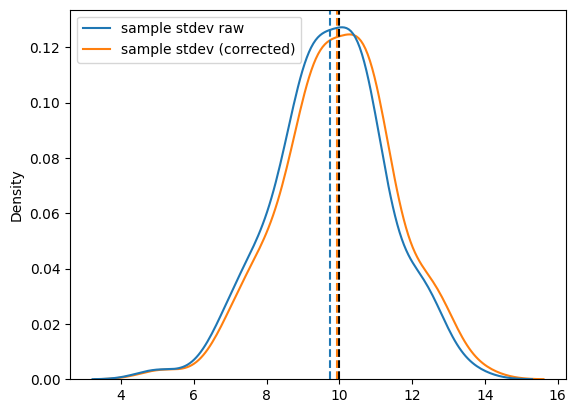

In [18]:
sns.kdeplot(data=df[['sample stdev raw', 'sample stdev (corrected)']])
plt.axvline(x=pop_std, color='black', ls='--')
plt.axvline(x = np.mean(df['sample stdev raw']), color='#1f77b4', ls='--'),
plt.axvline(x = np.mean(df['sample stdev (corrected)']), color='#ff7f0e', ls='--');

In [19]:
# Create a column that shows whether or not an error was made
df['error'] = abs(df['sample stdev raw'] - 10) < abs(df['sample stdev (corrected)'] - 10)

# Count the number of errors
df['error'].value_counts()

error
False    51
True     49
Name: count, dtype: int64

**If you rerun this experiment, a new seed may give different results! See the larger experiment below for more consistency**

From this KDE plot (basically a smoothed histogram), we can see the distribution and the mean value of the measured sample standard deviations, both corrected and not. Note that the corrected value, in orange, is closest to the true value of 10, shown in black. (If you got different results, that's great! Rerun the experiment and look for patterns--this is an excellent point of discussion.)

We could rerun this experiment as many times as we would like, but we will end up with similar results in the long term. To illustrate this, we can scale up the experiment.

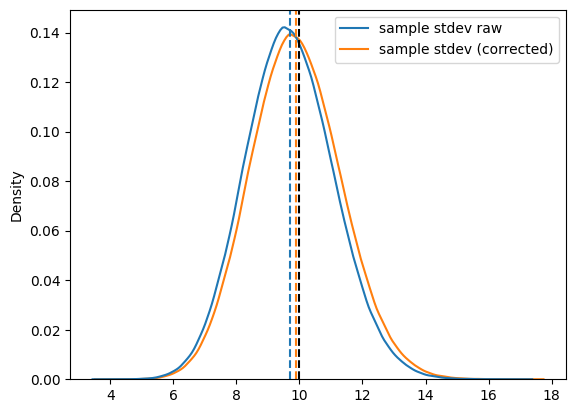

Observed necessary correction factor: 1.031159462191218
CPU times: user 1min 13s, sys: 1.99 s, total: 1min 15s
Wall time: 1min 14s


In [7]:
%%time

# This the same experiment, at a much larger scale. Time scale is O(n), in case you want to get aggressive with the sample size

pop_mean = 100
pop_std = 10
sample_size = 25

large_data_arr = []

for _ in range(1000000):
    row_data = np.random.normal(pop_mean, pop_std, sample_size)
    large_data_arr.append([sample_size, np.mean(row_data), np.std(row_data), np.std(row_data) * math.sqrt(sample_size/(sample_size-1))])
    
df1 = pd.DataFrame(data = large_data_arr, columns= ['n', 'sample mean', 'sample stdev raw', 'sample stdev (corrected)'])

sns.kdeplot(data=df1[['sample stdev raw', 'sample stdev (corrected)']])
plt.axvline(x=pop_std, color='black', ls='--')
plt.axvline(x = np.mean(df1['sample stdev raw']), color='#1f77b4', ls='--'),
plt.axvline(x = np.mean(df1['sample stdev (corrected)']), color='#ff7f0e', ls='--')

plt.show()

print(f"Observed necessary correction factor: {10 / np.mean(df1[['sample stdev raw']])}")

Now, let's examine the individual samples of 25 out of the 1,000,000 that we took. In how many of them was the corrected standard deviation closer to the true value? In other words, how often was the correction actually correct?

In [8]:
# Create a column that shows whether or not an error was made
df1['error'] = abs(df1['sample stdev raw'] - 10) < abs(df1['sample stdev (corrected)'] - 10)

# Count the number of errors
df1['error'].value_counts()

error
False    566193
True     433807
Name: count, dtype: int64

From this output, we can see that the correction is more often correct than incorrect. 'True' means that there was an error in using the correction. From both this and the visualization, we can see that using the Bessel correction is beneficial in the long term.

We can do one more check, but it is computationally intensive. We should examine if the $\frac{n}{n-1}$ correction factor can be confirmed at large sample sizes. To do this, we can take repeated large samples of small samples. A small sample will not necessarily have the population standard deviation, but an average of many small sample standard devations should approach the population standard deviation divided by the Bessel correction factor. The code to achieve this is below:

In [22]:
def experiment(pop_mean, pop_std, n, n_prime, n_dbl_prime) -> pd.DataFrame:
    '''Returns a randomly generated Data Frame that contains the standard deviations of many individual samples, and averages 
    the results. This process is repeated many times and added to the data frame.
    
    param: pop_mean: the known population mean
    param: pop_std: the know population standard deviation
    param: n: the sample size of the lowest level sample
    param: n_prime: number of samples taken in the experiment, whose standard deviations are averaged.
    param: n_double_prime: the number of time the experiment is repeated
    
    return: a pandas dataframe that contains the generated experiment data'''
    
    # Put this on hold...we might not need something this complicated
    
    exp_df = pd.DataFrame(columns=['trial', 'experiment', 'experiment stdev'])
    
    for i in range(1,n_dbl_prime+1):
        for j in range(1, n_prime+1):
            mean_of_stdevs = np.mean(np.std(np.random.normal(pop_mean, pop_std, n)))
            row = [i, j, mean_of_stdevs]
            exp_df.loc[len(exp_df.index)] = row
        
    return exp_df

In [23]:
# Create the experimental data frame

df3 = experiment(100, 10, 25, 100, 10000)

In [24]:
df3.head()

,trial,experiment,experiment stdev
0,1.0,1.0,8.774380
1,1.0,2.0,9.469871
2,1.0,3.0,10.480843
3,1.0,4.0,8.792073
4,1.0,5.0,8.947475


In [25]:
exp_avg_stdev = df3['experiment stdev'].mean()
exp_avg_stdev

9.695351682903592

In [26]:
print(f"Experimental Correction Factor: {pop_std/exp_avg_stdev}")
print(f"Bessel Correction Factor (Theoretical): {sample_size/(sample_size - 1)}")

Experimental Correction Factor: 1.0314221007200401
Bessel Correction Factor (Theoretical): 1.0416666666666667


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


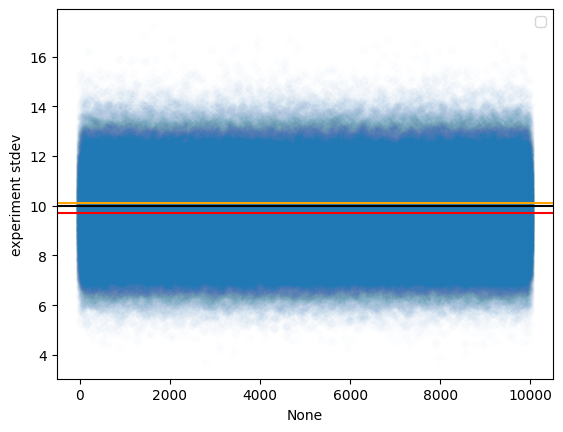

In [28]:
sns.scatterplot(data=df3, x= df3['trial'] + df3['experiment']/100, y = 'experiment stdev', alpha = 0.01)
plt.axhline(pop_std, color= 'black')
plt.axhline(exp_avg_stdev, color = 'red')
plt.axhline(exp_avg_stdev * sample_size/(sample_size-1), color = 'orange')

plt.legend()
plt.show()

In [81]:
def experiment2(pop_mean: float, pop_std: float, sample_size: int, trials: int) -> pd.DataFrame:
    
    exp_data_frame = pd.DataFrame(columns=['trial number', 'std dev'])
    
    for i in range(trials):
        sample_stdev = np.std(np.random.normal(pop_mean, pop_std, sample_size))
        row = [i+1, sample_stdev]
        exp_data_frame.loc[len(exp_data_frame.index)] = row
        
    return exp_data_frame
        

In [87]:
print(experiment2(100, 10, 25, 10000)['std dev'].mean())
print(10 / experiment2(100, 10, 25, 10000)['std dev'].mean())
print(25/24)


9.6974494708468
1.0320906500100744
1.0416666666666667


In [65]:
print(np.mean(df1[['sample stdev raw']]))
print(10 / np.mean(df1[['sample stdev raw']]))

9.697477419494167
1.0311960077264726


### Concluding Questions for Thought ###

* How does a change in sample size affect the Bessel correction factor? If we change the sample size, how will that change the rate of an 'error'?

* Why will the experiment with 100 samples sometimes give an answer that is counter to our assumptions and arguments? Could this happen with a 1,000,000 sample experiment? How likely is that to happen?

* Does changing the population mean or standard deviation change our interpretation of the experiment? What does this mean for our understanding of the normal distribution and its general applications?

Ideas for further study:

* At large sample sizes, the bessel correction factor appears to still fall short of the true stdev. can we plot the ratio of the known stdev to the calculated stdev at different sample sizes???? Then, we could try to find a regression...

In [56]:
# Generate data -- 10,000(?) samples of random size between 10 and 100.
# Plot the stdev of each sample vs. the sample size

pop_mean = 100
pop_std = 10

df2 = pd.DataFrame(columns= ['sample size', 'stdev', 'stdev ratio'])

for _ in range(10000):
    n = np.random.randint(10, 101)
    sample_stdev = np.std(np.random.normal(pop_mean, pop_std, n))
    row = [n, sample_stdev, 10/sample_stdev]
    df2.loc[len(df2.index)] = row

df2.shape

(10000, 3)

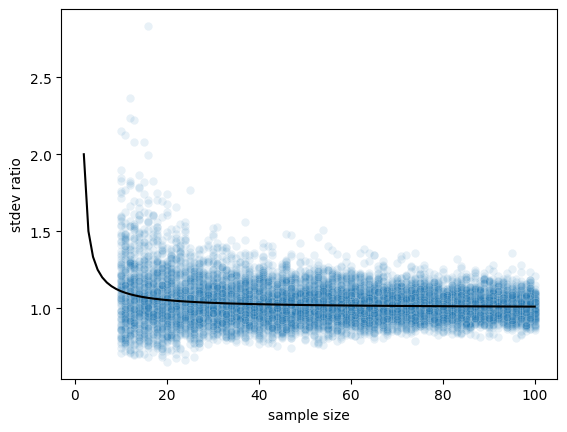

In [58]:
x = [i for i in range(2, 101)]
y = [i/(i-1) for i in x]

sns.scatterplot(data=df2, x='sample size', y='stdev ratio', alpha = 0.1)
plt.plot(x,y, color = 'black')

plt.show()

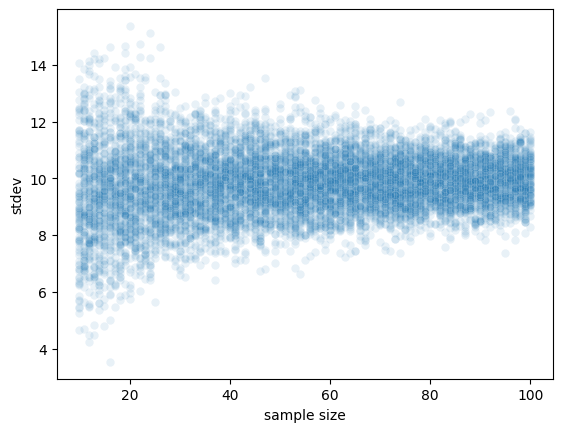

In [59]:
sns.scatterplot(data=df2, x = 'sample size', y = 'stdev', alpha = 0.1);